In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPRegressor,MLPClassifier
import sklearn.model_selection

In [95]:
sensor_data = pd.read_csv(r"C:\Users\ahmzar\Desktop\Mqtt_server\sensor_data_te_20221117_1019.csv")

In [96]:
sensor_data.shape

(1514, 15)

In [97]:
sensor_data = sensor_data.fillna(0)

In [98]:
sensor_data.head()

,Unnamed: 0,_id,Sensor address,sensor_id,humidity,temperature,vdd,waterleak,time,outside temperature (TF),outside relativeHumidity (TF),precipitation (TF),precipitation type (TF),light,motion
0,0,63728011caf3517df237c199,Matsal Addiva Sigurdsgatan,eui-a81758fffe075c91,36,21.9,3624,0.0,"2022/11/14, 18:51:13",6.8,98.7,0.0,Ingen nederbörd,0.0,0.0
1,1,63728011caf3517df237c19a,Pingisrum Addiva Sigurdsgatan,eui-a81758fffe075b65,37,22.2,3629,0.0,"2022/11/14, 18:51:13",6.8,98.7,0.0,Ingen nederbörd,0.0,0.0
2,2,637280a2caf3517df237c19b,Skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b66,36,22.3,3633,0.0,"2022/11/14, 18:53:38",6.8,98.7,0.0,Ingen nederbörd,0.0,0.0
3,3,637280a2caf3517df237c19c,Madelens skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b67,29,25.9,3636,0.0,"2022/11/14, 18:53:38",6.8,98.7,0.0,Ingen nederbörd,0.0,0.0
4,4,6372848c679d686ec9534093,Madelens skrivbord Addiva Sigurdsgatan,eui-a81758fffe075b67,29,25.8,3636,0.0,"2022/11/14, 19:10:20",6.8,98.7,0.0,Ingen nederbörd,0.0,0.0


In [99]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1514 non-null   int64  
 1   _id                            1514 non-null   object 
 2   Sensor address                 1514 non-null   object 
 3   sensor_id                      1514 non-null   object 
 4   humidity                       1514 non-null   int64  
 5   temperature                    1514 non-null   float64
 6   vdd                            1514 non-null   int64  
 7   waterleak                      1514 non-null   float64
 8   time                           1514 non-null   object 
 9   outside temperature (TF)       1514 non-null   float64
 10  outside relativeHumidity (TF)  1514 non-null   float64
 11  precipitation (TF)             1514 non-null   float64
 12  precipitation type (TF)        1514 non-null   o

In [100]:
sensor_data['light'].unique()

array([  0.,   1.,   2., 123., 120., 121., 122., 126., 132., 129., 131.,
       130., 128., 127., 125., 118.,   4., 124., 119., 117., 141.])

In [101]:
sensor_data.nunique()

Unnamed: 0                       1514
_id                              1514
Sensor address                      5
sensor_id                           5
humidity                           18
temperature                        28
vdd                                17
waterleak                           1
time                              766
outside temperature (TF)           35
outside relativeHumidity (TF)      89
precipitation (TF)                  1
precipitation type (TF)             3
light                              21
motion                              1
dtype: int64

In [102]:
x_x,y_y = sensor_data.drop(columns=['temperature']), sensor_data.temperature
x_train , x_test, y_train , y_test = sklearn.model_selection.train_test_split(x_x,y_y,test_size=0.2)

In [103]:
sensor_data= sensor_data.drop(columns=['_id','waterleak','vdd','precipitation (TF)','light','motion','Sensor address'])

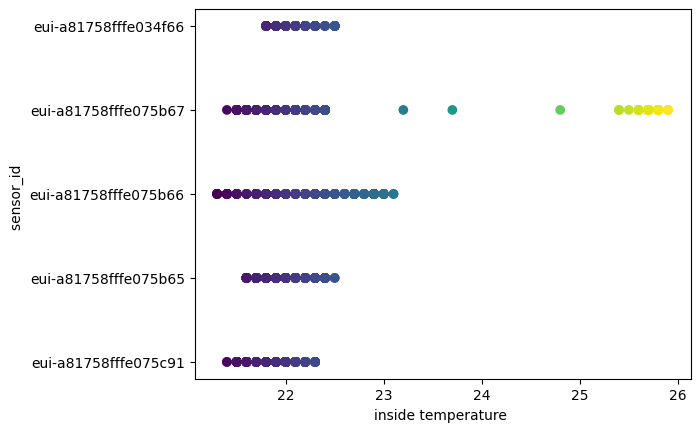

In [104]:
plt.scatter(sensor_data['temperature'],sensor_data['sensor_id'],c=y_y)
plt.xlabel('inside temperature ')
plt.ylabel('sensor_id ')
plt.show()

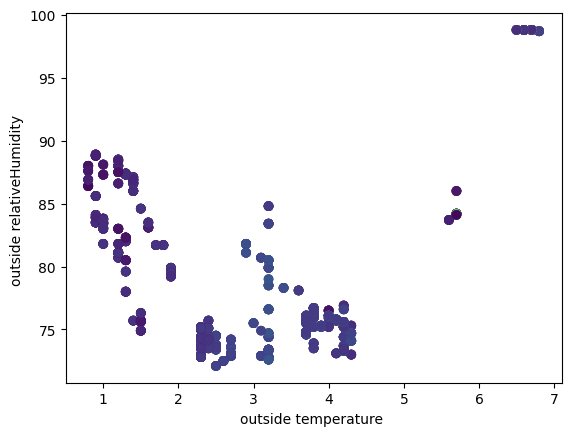

In [105]:
plt.scatter(sensor_data['outside temperature (TF)'],sensor_data['outside relativeHumidity (TF)'],c=y_y)
plt.xlabel('outside temperature ')
plt.ylabel('outside relativeHumidity ')
plt.show()

In [106]:
sensor_data

,Unnamed: 0,sensor_id,humidity,temperature,time,outside temperature (TF),outside relativeHumidity (TF),precipitation type (TF)
0,0,eui-a81758fffe075c91,36,21.9,"2022/11/14, 18:51:13",6.8,98.7,Ingen nederbörd
1,1,eui-a81758fffe075b65,37,22.2,"2022/11/14, 18:51:13",6.8,98.7,Ingen nederbörd
2,2,eui-a81758fffe075b66,36,22.3,"2022/11/14, 18:53:38",6.8,98.7,Ingen nederbörd
3,3,eui-a81758fffe075b67,29,25.9,"2022/11/14, 18:53:38",6.8,98.7,Ingen nederbörd
4,4,eui-a81758fffe075b67,29,25.8,"2022/11/14, 19:10:20",6.8,98.7,Ingen nederbörd
...,...,...,...,...,...,...,...,...
1509,1509,eui-a81758fffe075b65,25,21.8,"2022/11/17, 10:05:59",1.0,83.0,Ingen nederbörd
1510,1510,eui-a81758fffe034f66,28,21.9,"2022/11/17, 10:07:13",1.0,83.0,Ingen nederbörd
1511,1511,eui-a81758fffe075b66,26,22.1,"2022/11/17, 10:07:13",1.0,83.0,Ingen nederbörd
1512,1512,eui-a81758fffe075b67,24,22.1,"2022/11/17, 10:10:06",1.0,83.0,Ingen nederbörd


In [108]:
# generate the list of categorical and numerical variables
categorical_variables = sensor_data.nunique()[sensor_data.nunique() < 1000].keys().to_list()

numerical_variables=list(set(sensor_data.columns) - set(categorical_variables))
categorical_variables.remove('temperature')
############################################


ohe = OneHotEncoder(drop='first', sparse=False,handle_unknown = 'ignore')

X_train_ohe = ohe.fit_transform(x_train[categorical_variables])
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_variables))

# Transform only without fitting
X_test_ohe = ohe.transform(x_test[categorical_variables])
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_variables))


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(x_train[numerical_variables])
X_train_sc_df = pd.DataFrame(X_train_sc, columns=numerical_variables)

# Transform only without fitting
X_test_sc = scaler.transform(x_test[numerical_variables])
X_test_sc_df = pd.DataFrame(X_test_sc, columns=numerical_variables)

# Merging the transformed dataframe togheter
x_train = pd.merge(X_train_ohe_df, X_train_sc_df, left_index=True, right_index=True)
x_test = pd.merge(X_test_ohe_df, X_test_sc_df, left_index=True, right_index=True) 







c:\Users\ahmzar\Desktop\Mqtt_server\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\ahmzar\Desktop\Mqtt_server\env\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\ahmzar\Desktop\Mqtt_server\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [109]:
x_train= x_train.drop(columns=['Unnamed: 0'])

x_test= x_test.drop(columns=['Unnamed: 0'])

In [110]:
x_train

,sensor_id_eui-a81758fffe075b65,sensor_id_eui-a81758fffe075b66,sensor_id_eui-a81758fffe075b67,sensor_id_eui-a81758fffe075c91,humidity_24,humidity_25,humidity_26,humidity_27,humidity_28,humidity_29,...,outside relativeHumidity (TF)_88.0,outside relativeHumidity (TF)_88.1,outside relativeHumidity (TF)_88.4,outside relativeHumidity (TF)_88.5,outside relativeHumidity (TF)_88.8,outside relativeHumidity (TF)_88.9,outside relativeHumidity (TF)_98.7,outside relativeHumidity (TF)_98.8,precipitation type (TF)_Lätt regn,precipitation type (TF)_Okänd nederbördstyp
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1207,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1209,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:

x_test.values



array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [112]:
y_train.astype('int')


# lab = preprocessing.LabelEncoder()
# y_train = lab.fit_transform(y_train)

# y_train.shape


249     21
1112    21
769     22
147     21
762     22
        ..
924     22
1278    21
449     22
573     21
98      22
Name: temperature, Length: 1211, dtype: int32

In [113]:
y_test.astype('int')

# lab = preprocessing.LabelEncoder()
# y_test = lab.fit_transform(y_test)

# y_test


259     21
512     22
1512    22
460     22
1357    22
        ..
628     22
304     22
779     22
1051    21
638     22
Name: temperature, Length: 303, dtype: int32

In [114]:
sensor_data['temperature'].value_counts()

22.0    229
21.9    194
22.1    185
22.2    151
21.7    138
21.8    113
21.6    106
21.5     77
22.3     77
22.4     68
22.5     27
22.7     24
25.7     20
22.9     19
25.8     15
22.6     13
21.4     13
23.0     12
22.8     10
21.3      6
25.6      5
25.9      4
25.4      2
23.1      2
23.2      1
23.7      1
24.8      1
25.5      1
Name: temperature, dtype: int64

In [115]:
sensor_data

,Unnamed: 0,sensor_id,humidity,temperature,time,outside temperature (TF),outside relativeHumidity (TF),precipitation type (TF)
0,0,eui-a81758fffe075c91,36,21.9,"2022/11/14, 18:51:13",6.8,98.7,Ingen nederbörd
1,1,eui-a81758fffe075b65,37,22.2,"2022/11/14, 18:51:13",6.8,98.7,Ingen nederbörd
2,2,eui-a81758fffe075b66,36,22.3,"2022/11/14, 18:53:38",6.8,98.7,Ingen nederbörd
3,3,eui-a81758fffe075b67,29,25.9,"2022/11/14, 18:53:38",6.8,98.7,Ingen nederbörd
4,4,eui-a81758fffe075b67,29,25.8,"2022/11/14, 19:10:20",6.8,98.7,Ingen nederbörd
...,...,...,...,...,...,...,...,...
1509,1509,eui-a81758fffe075b65,25,21.8,"2022/11/17, 10:05:59",1.0,83.0,Ingen nederbörd
1510,1510,eui-a81758fffe034f66,28,21.9,"2022/11/17, 10:07:13",1.0,83.0,Ingen nederbörd
1511,1511,eui-a81758fffe075b66,26,22.1,"2022/11/17, 10:07:13",1.0,83.0,Ingen nederbörd
1512,1512,eui-a81758fffe075b67,24,22.1,"2022/11/17, 10:10:06",1.0,83.0,Ingen nederbörd


In [116]:
clf_3 = MLPRegressor (learning_rate_init=0.001,hidden_layer_sizes=(100,100,100,100),random_state=42,alpha=1e-5,solver='lbfgs')

clf_3.fit(x_train,y_train)


socre = clf_3.score(x_test,y_test)

print(socre*100)



85.45238502418847


c:\Users\ahmzar\Desktop\Mqtt_server\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [117]:
t=x_test.iloc[1:2]
t

,sensor_id_eui-a81758fffe075b65,sensor_id_eui-a81758fffe075b66,sensor_id_eui-a81758fffe075b67,sensor_id_eui-a81758fffe075c91,humidity_24,humidity_25,humidity_26,humidity_27,humidity_28,humidity_29,...,outside relativeHumidity (TF)_88.0,outside relativeHumidity (TF)_88.1,outside relativeHumidity (TF)_88.4,outside relativeHumidity (TF)_88.5,outside relativeHumidity (TF)_88.8,outside relativeHumidity (TF)_88.9,outside relativeHumidity (TF)_98.7,outside relativeHumidity (TF)_98.8,precipitation type (TF)_Lätt regn,precipitation type (TF)_Okänd nederbördstyp
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
pred = clf_3.predict(x_test)
pred


array([21.94894359, 22.18720441, 21.91602943, 22.54572718, 21.91241265,
       21.86379719, 21.51371616, 21.94102845, 24.21849634, 22.52598377,
       22.02872822, 22.08609287, 21.82682327, 22.49943018, 22.00594585,
       21.90367968, 22.48853013, 21.81802797, 21.82724281, 22.00380974,
       22.6376238 , 21.95695764, 21.91236829, 21.83880421, 22.10762154,
       22.15928586, 21.94891873, 22.19942861, 21.97466913, 21.76989596,
       22.24127678, 22.48530126, 21.7228942 , 21.65160176, 21.94934256,
       22.18610121, 21.71022212, 21.82216214, 21.8404872 , 21.69403777,
       22.19320241, 21.56204359, 22.33345399, 22.01437758, 21.96155914,
       21.49058255, 22.01431626, 22.15448854, 21.71424489, 22.69424315,
       22.0238049 , 22.32524692, 22.01218272, 25.33459655, 22.06157036,
       22.00846409, 22.8118785 , 21.62686869, 21.66321975, 21.84699663,
       22.05039956, 21.66965847, 22.25766234, 22.06541251, 21.97553168,
       21.90089037, 22.35777295, 21.53511931, 22.415471  , 22.14